In [ ]:
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


from datetime import datetime
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.utils import column_or_1d

from keras.models import Sequential
from keras.layers import Dense, GRU
from keras.layers import Conv1D, Conv2D, MaxPooling2D, Flatten, Dense, RepeatVector

In [ ]:
# Đọc dữ liệu từ tệp CSV
data = pd.read_csv('acb.csv')

In [ ]:
# Xử lý dữ liệu
prices = data['Price']

In [ ]:
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
scaled_prices = scaler.fit_transform(prices.values.reshape(-1, 1))

In [ ]:
scaled_prices

array([[0.13206988],
       [0.13068542],
       [0.13206988],
       ...,
       [0.62679829],
       [0.63605888],
       [0.64763461]])

In [ ]:
#RATIO 73

In [ ]:
# Chia dữ liệu thành tập train test
np.random.seed(42)

train_size = int(len(scaled_prices) * 0.8)
test_size = int(len(scaled_prices) * 0.2)

train_data = scaled_prices[:train_size]
test_data = scaled_prices[train_size:train_size+test_size]

In [ ]:
test_data

array([[0.4601077 ],
       [0.51798638],
       [0.55965903],
       [0.56428932],
       [0.58512564],
       [0.57123476],
       [0.5828105 ],
       [0.5388227 ],
       [0.49715005],
       [0.5388227 ],
       [0.55039844],
       [0.61522256],
       [0.62679829],
       [0.63142858],
       [0.63374373],
       [0.60364682],
       [0.5828105 ],
       [0.52724697],
       [0.55039844],
       [0.58049535],
       [0.55502873],
       [0.52030152],
       [0.55734388],
       [0.53419241],
       [0.47862888],
       [0.5388227 ],
       [0.56891961],
       [0.57354991],
       [0.54808329],
       [0.53650755],
       [0.55039844],
       [0.56660447],
       [0.58975594],
       [0.62448314],
       [0.61985285],
       [0.6175377 ],
       [0.63605888],
       [0.68236182],
       [0.68699211],
       [0.62679829],
       [0.62679829],
       [0.64300432],
       [0.6615255 ],
       [0.63605888],
       [0.6615255 ],
       [0.66615579],
       [0.66847094],
       [0.659

In [ ]:
# Chia dữ liệu thành các mẫu chuỗi thời gian
def create_time_series(data, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])
        y.append(data[i+time_steps])
    return np.array(X), np.array(y)


In [ ]:
time_steps = 30  # Số ngày quan sát trước để dự đoán ngày tiếp theo
X_train, y_train = create_time_series(train_data, time_steps)
X_test, y_test = create_time_series(test_data, time_steps)

In [ ]:
X_train.shape

(1158, 30, 1)

In [ ]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
# 8. Define GRU Model

model = Sequential()
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(time_steps, 1)))
model.add(Conv1D(filters=64, kernel_size=3, activation='softmax'))
model.add(GRU(64, return_sequences = False))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Biên dịch mô hình
model.compile(optimizer='adam', loss='mean_squared_error')

# Huấn luyện mô hình
model.fit(X_train, y_train, epochs=100, batch_size=64)

# Đánh giá mô hình trên tập kiểm tra
loss = model.evaluate(X_test, y_test)
print('Loss trên tập kiểm tra:', loss)

Epoch 1/100

19/19 [==============================] - 2s 8ms/step - loss: 0.1358
Epoch 2/100
19/19 [==============================] - 0s 7ms/step - loss: 0.0805
Epoch 3/100
19/19 [==============================] - 0s 7ms/step - loss: 0.0558
Epoch 4/100
19/19 [==============================] - 0s 8ms/step - loss: 0.0096
Epoch 5/100
19/19 [==============================] - 0s 8ms/step - loss: 0.0020
Epoch 6/100
19/19 [==============================] - 0s 8ms/step - loss: 0.0014
Epoch 7/100
19/19 [==============================] - 0s 7ms/step - loss: 0.0012
Epoch 8/100
19/19 [==============================] - 0s 8ms/step - loss: 0.0012
Epoch 9/100
19/19 [==============================] - 0s 7ms/step - loss: 0.0011
Epoch 10/100
19/19 [==============================] - 0s 7ms/step - loss: 0.0011
Epoch 11/100
19/19 [==============================] - 0s 7ms/step - loss: 0.0011
Epoch 12/100
19/19 [==============================] - 0s 7ms/step - loss: 9.9834e-04
Epoch 13/100
19/19 [============

In [ ]:
data.index


RangeIndex(start=0, stop=1485, step=1)

In [ ]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay

# Tạo biến train, test
train = prices[:train_size]
test = prices[train_size:train_size+test_size]

y_test_pred = model.predict(X_test)
y_test_pred = scaler.inverse_transform(y_test_pred)

n_past = 1
n_days_for_prediction= 30

#create an array of 30 integers starting from last index
predict_period_dates = np.array(range(len(data) + 1,len(data) + 31)).reshape(-1, 1)

print(predict_period_dates)

#Make prediction
prediction1 = model.predict(X_test[-n_days_for_prediction:])

prediction_copies1 = np.repeat(prediction1, prices.shape[0], axis=-1)
predicted_prices = scaler.inverse_transform(prediction_copies1)[:,0]
print(predicted_prices)

9/9 [==============================] - 0s 2ms/step
[[1486]
 [1487]
 [1488]
 [1489]
 [1490]
 [1491]
 [1492]
 [1493]
 [1494]
 [1495]
 [1496]
 [1497]
 [1498]
 [1499]
 [1500]
 [1501]
 [1502]
 [1503]
 [1504]
 [1505]
 [1506]
 [1507]
 [1508]
 [1509]
 [1510]
 [1511]
 [1512]
 [1513]
 [1514]
 [1515]]
1/1 [==============================] - 0s 16ms/step
[21974.525 22071.684 22055.277 22351.957 22512.918 22440.416 22367.246
 22461.87  22839.3   23161.361 22987.055 22626.926 22455.475 22477.092
 22292.59  22033.523 21787.398 21678.402 21748.232 21792.906 21794.148
 21964.406 22045.37  22114.303 22217.3   22277.31  22291.908 22340.912
 22278.777 22300.31 ]


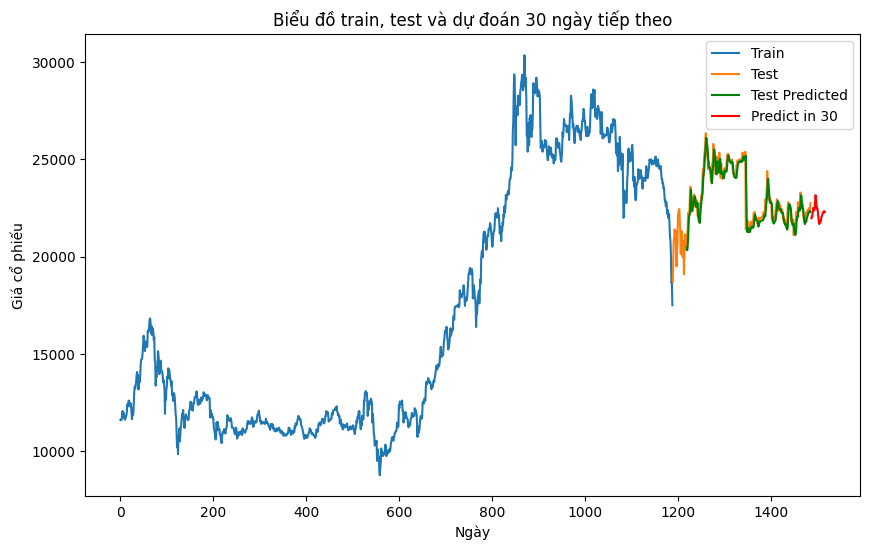

In [ ]:
# Tạo biểu đồ train, test và dự đoán 30 ngày tiếp theo
plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(range(train_size, train_size + len(test)), test, label='Test')

plt.plot(range(train_size + 30,train_size + test_size), y_test_pred, 'g', label='Test Predicted')

plt.plot(predict_period_dates, predicted_prices, 'r', label='Predict in 30')

plt.xlabel('Ngày')
plt.ylabel('Giá cổ phiếu')
plt.title('Biểu đồ train, test và dự đoán 30 ngày tiếp theo')
plt.legend()
plt.show()

In [ ]:
y_test_pred

array([[20452.383],
       [20336.734],
       [20533.951],
       [20971.072],
       [21664.014],
       [22072.92 ],
       [22136.238],
       [22280.361],
       [22904.291],
       [23443.777],
       [23010.738],
       [22447.152],
       [22350.24 ],
       [22633.748],
       [22620.344],
       [22763.28 ],
       [22977.068],
       [23104.48 ],
       [23051.814],
       [22841.793],
       [22576.803],
       [22552.049],
       [22676.014],
       [22773.066],
       [22410.55 ],
       [22050.846],
       [21849.318],
       [21779.178],
       [21735.305],
       [22116.584],
       [22454.62 ],
       [22679.34 ],
       [22935.955],
       [23059.916],
       [23243.393],
       [23757.47 ],
       [24274.113],
       [24344.535],
       [24656.164],
       [25077.385],
       [25374.32 ],
       [25736.49 ],
       [26112.57 ],
       [25834.27 ],
       [25785.672],
       [25490.139],
       [25089.135],
       [24658.055],
       [24605.717],
       [24557.977],


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, mean_squared_log_error

# Dự đoán giá trong quá trình testing
y_test_predicted = model.predict(X_test)

# Đưa các dự đoán về lại tỷ lệ ban đầu
y_test_predicted = scaler.inverse_transform(y_test_predicted)

y_test1 = scaler.inverse_transform(y_test)


# Tính MAE cho testing
mae_test = mean_absolute_error(y_test1, y_test_predicted)

# Tính MAPE cho testing
mape_test = mean_absolute_percentage_error(y_test1, y_test_predicted)

# Tính RMSE cho testing
rmse_test = mean_squared_error(y_test1, y_test_predicted, squared=False)

# Tính MSLE cho testing
msle_test = mean_squared_log_error(y_test1, y_test_predicted, squared=False)




9/9 [==============================] - 0s 3ms/step


In [ ]:
y_test1

array([[20650.],
       [21000.],
       [21500.],
       [22250.],
       [22150.],
       [22100.],
       [22500.],
       [23500.],
       [23600.],
       [22300.],
       [22300.],
       [22650.],
       [23050.],
       [22500.],
       [23050.],
       [23150.],
       [23200.],
       [23000.],
       [22750.],
       [22550.],
       [22800.],
       [22900.],
       [22900.],
       [22100.],
       [22100.],
       [22000.],
       [22000.],
       [21900.],
       [22700.],
       [22650.],
       [22850.],
       [23150.],
       [23100.],
       [23450.],
       [24200.],
       [24500.],
       [24150.],
       [25000.],
       [25300.],
       [25500.],
       [26000.],
       [26350.],
       [25400.],
       [26050.],
       [25200.],
       [25000.],
       [24500.],
       [24900.],
       [24600.],
       [24650.],
       [24500.],
       [24200.],
       [23900.],
       [23850.],
       [24550.],
       [24800.],
       [24800.],
       [25800.],
       [25500.

In [ ]:
mape_test *= 100


print('---------TEST----------')
print("MAPE:", round(mape_test,3))
print("MAE:", round(mae_test,3))
print("RMSE:", round(rmse_test,3))
print("MSLE:", round(msle_test,3))
print('-------------------')


---------TEST----------
MAPE: 1.394
MAE: 322.102
RMSE: 471.238
MSLE: 0.02
-------------------
